# Dados sobre as reclamações realizadas no site:

##### https://www.consumidor.gov.br/pages/principal/?1652964614719

### Bibliotecas Utilizadas:

In [56]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Versões
print('Python:', sys.version)
print('Pandas:', pd.__version__)

Python: 3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)]
Pandas: 1.4.2


### Carregando a base de dados:

In [6]:
# Unindo os dados dos meses de 2022(Até Abril), em apenas um DataFrame

extensao = 'csv'

arquivos_csv = [i for i in glob.glob(f'../AED_04_Consumidor_Gov_Br/data/*.{extensao}')]
df_gov = pd.concat([pd.read_csv(f, sep=';') for f in arquivos_csv])

df_gov.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor
0,S,SC,Florianópolis,M,entre 51 a 60 anos,2022-01-19,NaN,Banco BV (antigo Banco Votorantim),"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Financiamentos de Veículos / Leasing,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Loja física,S,N,Finalizada avaliada,Não Resolvida,1.0
1,NE,MA,Timon,M,mais de 70 anos,2022-01-01,NaN,Oi Fixo,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Internet,S,N,Finalizada não avaliada,Não Avaliada,NaN
2,S,RS,Santa Maria,M,entre 21 a 30 anos,2022-01-01,10.0,Vivo - Telefônica,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Cobrança / Contestação,Cobrança em duplicidade / Cobrança referente a...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN
3,NE,BA,Teixeira de Freitas,M,entre 21 a 30 anos,2022-01-01,NaN,Uber,Empresas de Intermediação de Serviços / Negócios,Demais Serviços,Aplicativo de mobilidade urbana,Contrato / Oferta,Dificuldade para contratar o serviço (problema...,Não comprei / contratei,S,N,Finalizada não avaliada,Não Avaliada,NaN
4,SE,RJ,Rio de Janeiro,M,entre 41 a 50 anos,2022-01-04,NaN,Central Nacional Unimed,Operadoras de Planos de Saúde e Administradora...,Saúde,"Plano de Saúde (convênio, autogestão, seguro s...",Atendimento / SAC,SAC - Demanda não resolvida / não respondida /...,Domicílio,S,N,Finalizada não avaliada,Não Avaliada,NaN


In [8]:
# Verificando a quantidade de linhas e colunas
df_gov.shape

(513283, 19)

In [47]:
# Criando a variavel 'Solicitação' aonde cada linha vai receber o numero 1 como identificação
df_gov['Solicitação'] = 1

In [48]:
# Verificando o nome das colunas
df_gov.columns

Index(['Região', 'UF', 'Cidade', 'Sexo', 'Faixa Etária', 'Data Finalização',
       'Tempo Resposta', 'Nome Fantasia', 'Segmento de Mercado', 'Área',
       'Assunto', 'Grupo Problema', 'Problema', 'Como Comprou Contratou',
       'Procurou Empresa', 'Respondida', 'Situação', 'Avaliação Reclamação',
       'Nota do Consumidor', 'Solicitação'],
      dtype='object')

#### Verificar a quantidade de solicitações(Reclamações) por Região

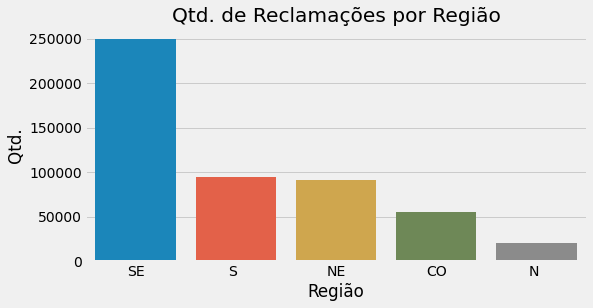

In [28]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,4))
sns.countplot(data=df_gov, x='Região', order = df_gov['Região'].value_counts().index)
plt.title('Qtd. de Reclamações por Região')
plt.xlabel('Região')
plt.ylabel('Qtd.')
plt.show()

#### Verificar a quantidade de solicitações(Reclamações) por Estado

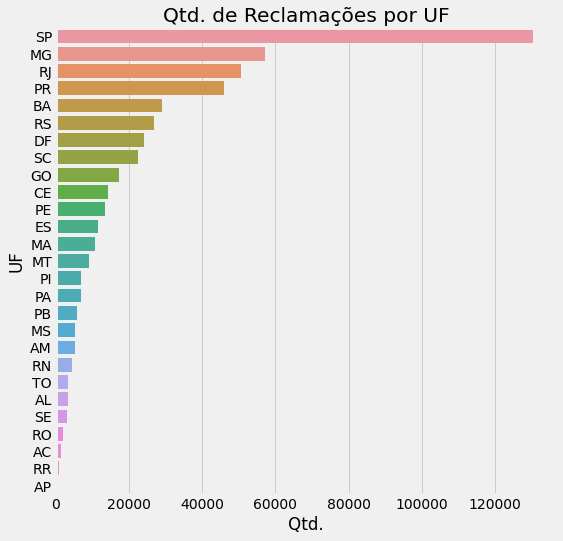

In [35]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))
sns.countplot(data=df_gov, y='UF',order = df_gov['UF'].value_counts().index)
plt.title('Qtd. de Reclamações por UF')
plt.xlabel('Qtd.')
plt.ylabel('UF')
plt.show()

#### Verificar a quantidade de solicitações(Reclamações) por sexo

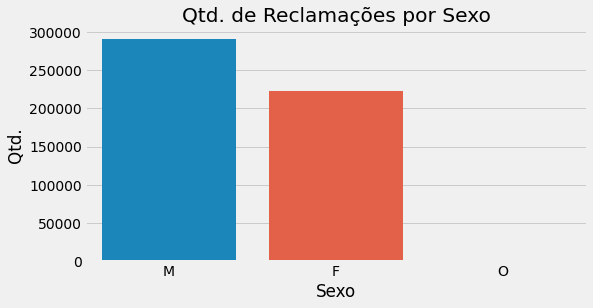

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,4))
sns.countplot(data=df_gov, x='Sexo')
plt.title('Qtd. de Reclamações por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Qtd.')
plt.show()

#### Verificar a quantidade de solicitações(Reclamações) por faixa de idade

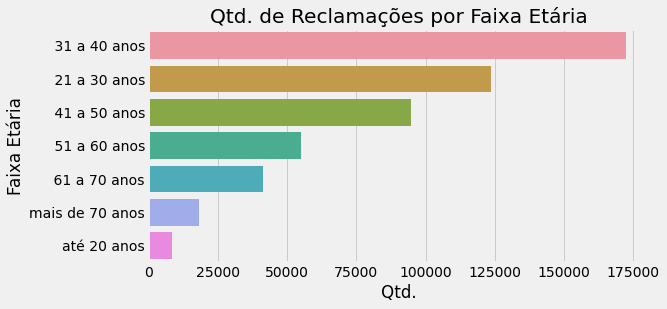

In [32]:

df_gov['Faixa Etária'] = df_gov['Faixa Etária'].str.replace('entre','', regex=True)  

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,4))
sns.countplot(data=df_gov, y='Faixa Etária',order = df_gov['Faixa Etária'].value_counts().index)
plt.title('Qtd. de Reclamações por Faixa Etária')
plt.xlabel('Qtd.')
plt.ylabel('Faixa Etária')
plt.show()

#### Verificar a quantidade de solicitações(Reclamações) por Segmento de Mercado

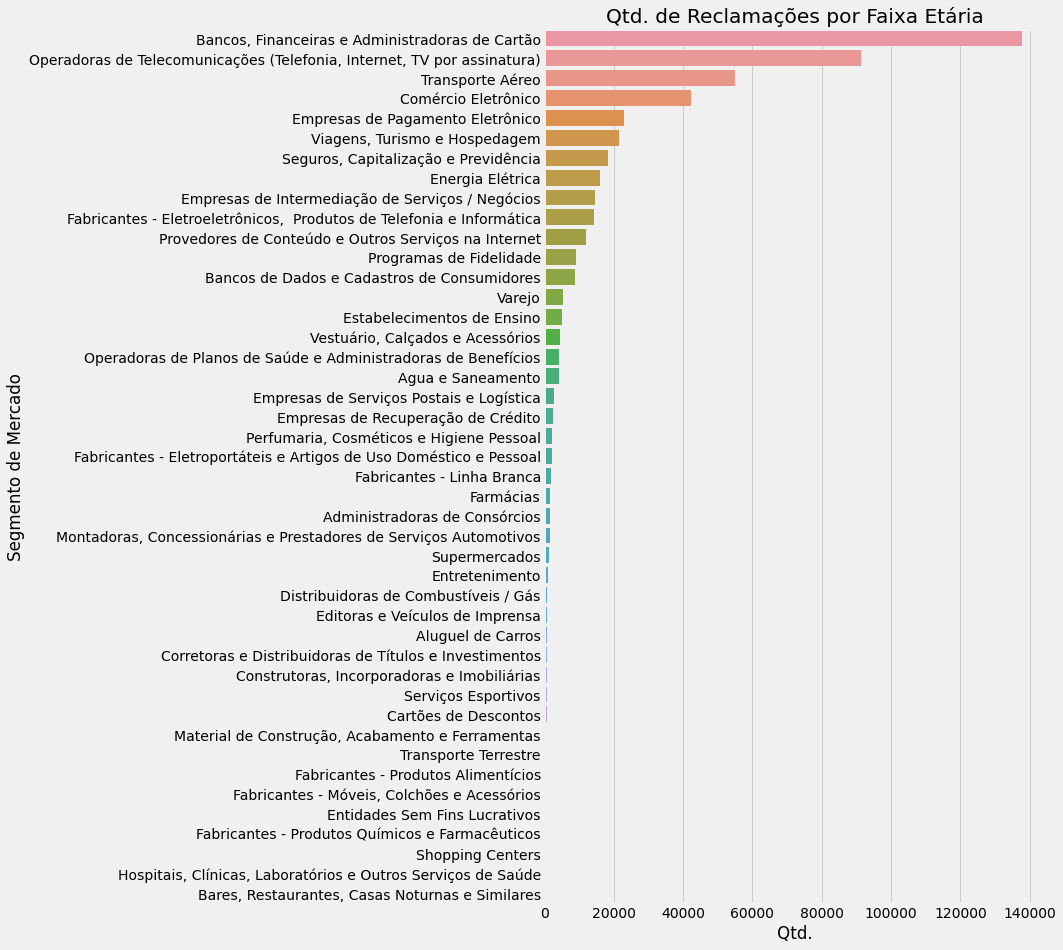

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,15))
sns.countplot(data=df_gov, y='Segmento de Mercado',order = df_gov['Segmento de Mercado'].value_counts().index)
plt.title('Qtd. de Reclamações por Segmento de Mercado')
plt.xlabel('Qtd.')
plt.ylabel('Segmento de Mercado')
plt.show()

In [46]:
# Porcentagem de solicitações respondidas ou não

total = df_gov['Respondida'].count()
freq_resposta = df_gov['Respondida'].value_counts()
freq_poec = round(df_gov['Respondida'].value_counts(normalize=True) * 100,2)

print("Total de Reclamações(Até 04/2022):",total)
print(f'Reclamações Respondidas:',freq_resposta[0], '-', freq_poec[0])
print(f'Reclamações Respondidas:',freq_resposta[1], '-', freq_poec[1])

Total de Reclamações(04/2022): 513283
Reclamações Respondidas: 503337 - 98.06
Reclamações Respondidas: 9946 - 1.94


In [58]:
df_filtro_seg_mercado = df_gov[['Segmento de Mercado','Solicitação','Respondida']]
df_filtro_seg_mercado_s = df_filtro_seg_mercado['Respondida'] == 'S'
df_filtro_seg_mercado_2 = df_filtro_seg_mercado[df_filtro_seg_mercado_s]
df_filtro_seg_mercado_group = df_filtro_seg_mercado_2.groupby(['Segmento de Mercado']).count()
df_filtro_seg_mercado_2 = df_gov[['Segmento de Mercado','Solicitação']]
df_filtro_seg_mercado_2_group = df_filtro_seg_mercado_2.groupby(['Segmento de Mercado']).count()
df_filtro_seg_mercado_2_group['Respondida'] = df_filtro_seg_mercado_group['Respondida']
df_filtro_seg_mercado_2_group.fillna(0, inplace=True)
df_filtro_seg_mercado_2_group['Respondida'] = df_filtro_seg_mercado_2_group['Respondida'].astype(np.int64)
df_filtro_seg_mercado_2_group['% Respondida'] = round(df_filtro_seg_mercado_2_group['Respondida'] / df_filtro_seg_mercado_2_group['Solicitação'] * 100, 2) 
df_filtro_seg_mercado_2_group.sort_values(by='% Respondida')


,Solicitação,Respondida,% Respondida
Segmento de Mercado,,,
"Bares, Restaurantes, Casas Noturnas e Similares",2,0,0.00
"Hospitais, Clínicas, Laboratórios e Outros Serviços de Saúde",4,0,0.00
Entidades Sem Fins Lucrativos,50,20,40.00
Transporte Terrestre,411,276,67.15
Agua e Saneamento,4123,2892,70.14
Entretenimento,1199,860,71.73
Shopping Centers,6,5,83.33
Fabricantes - Produtos Químicos e Farmacêuticos,15,13,86.67
Editoras e Veículos de Imprensa,879,794,90.33
